# Análisis Exploratorio de Datos

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [83]:
data = pd.read_csv("train.csv")
data.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


## Datos faltantes

In [84]:
data.count()

TripType                 647054
VisitNumber              647054
Weekday                  647054
Upc                      642925
ScanCount                647054
DepartmentDescription    645693
FinelineNumber           642925
dtype: int64

In [85]:
print(647054-642925)
print(4129/647054)

4129
0.006381229387346342


Podemos ver que hay 4129 filas que se encuentran vacías y representan al rededor .6 % y podemos remover 

## Número de tipos de visitas

In [86]:
len(data.TripType.unique())

38

## Número de vistas

In [87]:
len(data.VisitNumber.unique())

95674

## Número de compras

In [88]:
h = data.ScanCount.unique()
h[::-1].sort()
h

array([ 71,  51,  46,  31,  30,  25,  24,  23,  22,  20,  19,  18,  17,
        16,  15,  14,  13,  12,  11,  10,   9,   8,   7,   6,   5,   4,
         3,   2,   1,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -9, -10, -12])

Podemos ver que existen **valores negativos** que implican productos devueltos. Hay algun producto que fue comprado en una misma vez 71 veces, y también hay un producto que fue devuelto 12 veces.

## Tipos de departamento

In [89]:
dep = data.DepartmentDescription.unique()

In [90]:
data.DepartmentDescription.unique()

array(['FINANCIAL SERVICES', 'SHOES', 'PERSONAL CARE',
       'PAINT AND ACCESSORIES', 'DSD GROCERY', 'MEAT - FRESH & FROZEN',
       'DAIRY', 'PETS AND SUPPLIES', 'HOUSEHOLD CHEMICALS/SUPP', nan,
       'IMPULSE MERCHANDISE', 'PRODUCE', 'CANDY, TOBACCO, COOKIES',
       'GROCERY DRY GOODS', 'BOYS WEAR', 'FABRICS AND CRAFTS',
       'JEWELRY AND SUNGLASSES', 'MENS WEAR', 'ACCESSORIES',
       'HOME MANAGEMENT', 'FROZEN FOODS', 'SERVICE DELI',
       'INFANT CONSUMABLE HARDLINES', 'PRE PACKED DELI', 'COOK AND DINE',
       'PHARMACY OTC', 'LADIESWEAR', 'COMM BREAD', 'BAKERY',
       'HOUSEHOLD PAPER GOODS', 'CELEBRATION', 'HARDWARE', 'BEAUTY',
       'AUTOMOTIVE', 'BOOKS AND MAGAZINES', 'SEAFOOD', 'OFFICE SUPPLIES',
       'LAWN AND GARDEN', 'SHEER HOSIERY', 'WIRELESS', 'BEDDING',
       'BATH AND SHOWER', 'HORTICULTURE AND ACCESS', 'HOME DECOR', 'TOYS',
       'INFANT APPAREL', 'LADIES SOCKS', 'PLUS AND MATERNITY',
       'ELECTRONICS', 'GIRLS WEAR, 4-6X  AND 7-14', 'BRAS & SHAPEWEAR',

In [91]:
len(data.DepartmentDescription.unique())

69

Es decir, hay 69 distintos departamentos ligados a cada producto

## Número de productos

In [92]:
len(data.Upc.unique())

97715

## Categorías para productos

In [93]:
len(data.FinelineNumber.unique())

5196

Hay 5196 categorias asignadas para 97715 productos

# Limpieza de datos

In [94]:
data = data.dropna()
len(data)

642925

In [95]:
data.count()

TripType                 642925
VisitNumber              642925
Weekday                  642925
Upc                      642925
ScanCount                642925
DepartmentDescription    642925
FinelineNumber           642925
dtype: int64

Nos quedamos con 642925 entradas de datos

## Renombrar columnas

In [96]:
data.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


In [97]:
data.columns = ['tipo_visita', 'ticket', 'dia', 'producto', 'items_comprados', 'departamento', 'categoria']

In [98]:
data.head()

,tipo_visita,ticket,dia,producto,items_comprados,departamento,categoria
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


## Reorganización de día

In [99]:
data = data.replace("Monday", 1)
data = data.replace("Tuesday", 2)
data = data.replace("Wednesday", 3)
data = data.replace("Thursday", 4)
data = data.replace("Friday", 5)
data = data.replace("Saturday", 6)
data = data.replace("Sunday", 7)

In [100]:
data.head()

,tipo_visita,ticket,dia,producto,items_comprados,departamento,categoria
0,999,5,5,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,5,6.053882e+10,1,SHOES,8931.0
2,30,7,5,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,5,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,5,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


# Analisis 1

In [101]:
x = data.tipo_visita.unique()
np.sort(x)

array([  3,   4,   5,   6,   7,   8,   9,  12,  14,  15,  18,  19,  20,
        21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44, 999])

Recordemos que teníamos 38 tipos de visitas. Nos interesaría saber qúe tipo de visitas son las más pulares. O también, nos interesaría saber si las visitas están distribuidas uniformemente.

In [102]:
data_tipo_visita = data.drop_duplicates("ticket")

In [103]:
x = data_tipo_visita["tipo_visita"]
x = x.value_counts()

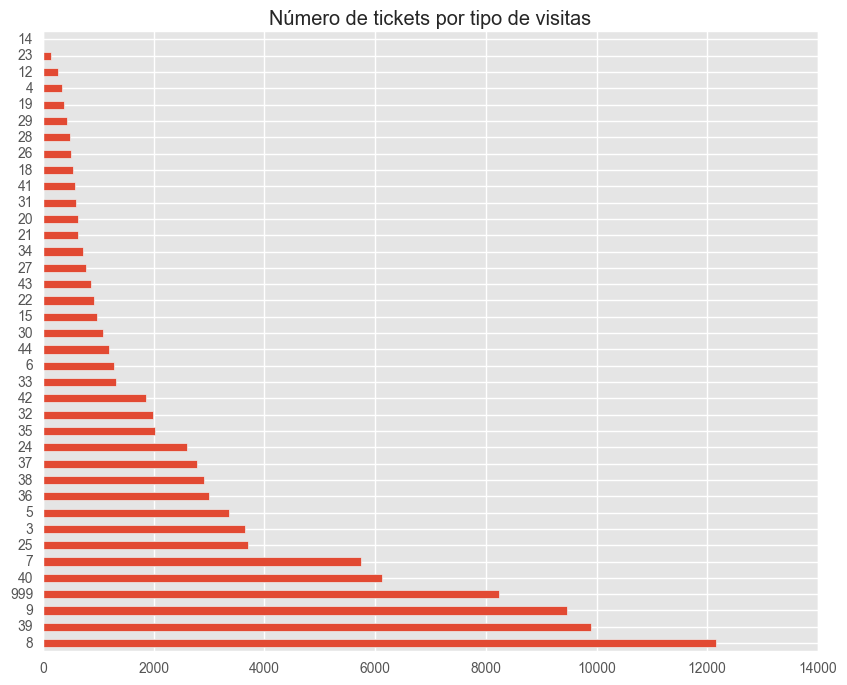

In [104]:
graph = x.plot(kind="barh", figsize=(10, 8))
graph.set_title("Número de tickets por tipo de visitas")

1. Nos interesaría entender que tipo de productos compran por visita.
2. Nos interesaría saber además, si influye el tipo de día. 
3. Y finalmente, cómo impacta el numero de productos comprados

## Tipo de vista y sus productos (departamento)

Veamos que el tipo de visita 5 corresponde a qué tipo de productos basados en su departamento

In [105]:
tipo_visita_5 = data[data.tipo_visita == 5]
tipo_visita_5.head()

,tipo_visita,ticket,dia,producto,items_comprados,departamento,categoria
269,5,105,5,6.374800e+10,2,PHARMACY OTC,309.0
270,5,105,5,6.374801e+10,1,PHARMACY OTC,312.0
271,5,105,5,6.811312e+10,1,PHARMACY OTC,2561.0
436,5,218,5,6.811313e+10,1,PHARMACY OTC,2303.0
617,5,285,5,3.813712e+10,1,PHARMACY OTC,3524.0


In [106]:
tipo_visita_5_departamento = tipo_visita_5[["tipo_visita","departamento"]]
tipo_visita_5_departamento.head()

,tipo_visita,departamento
269,5,PHARMACY OTC
270,5,PHARMACY OTC
271,5,PHARMACY OTC
436,5,PHARMACY OTC
617,5,PHARMACY OTC


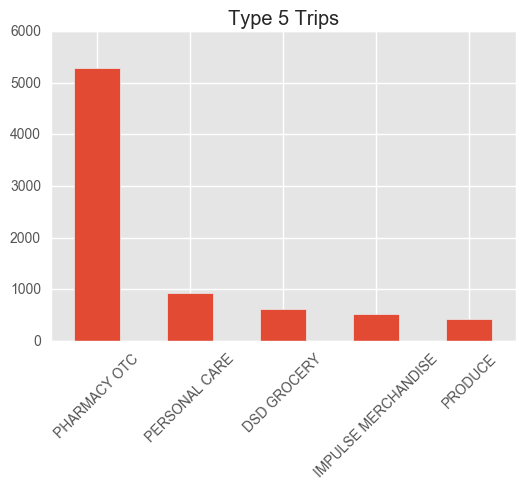

In [107]:
tipo_visita_5_departamento.departamento.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 5 Trips")

Vemos que esta muy ligado a cosas de farmacia y productos personales